In [ ]:
# COVID-19 Global Forecasting
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("covid19.csv")
data = df.drop(columns = ['Province/State'])
data.head(4)

,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0


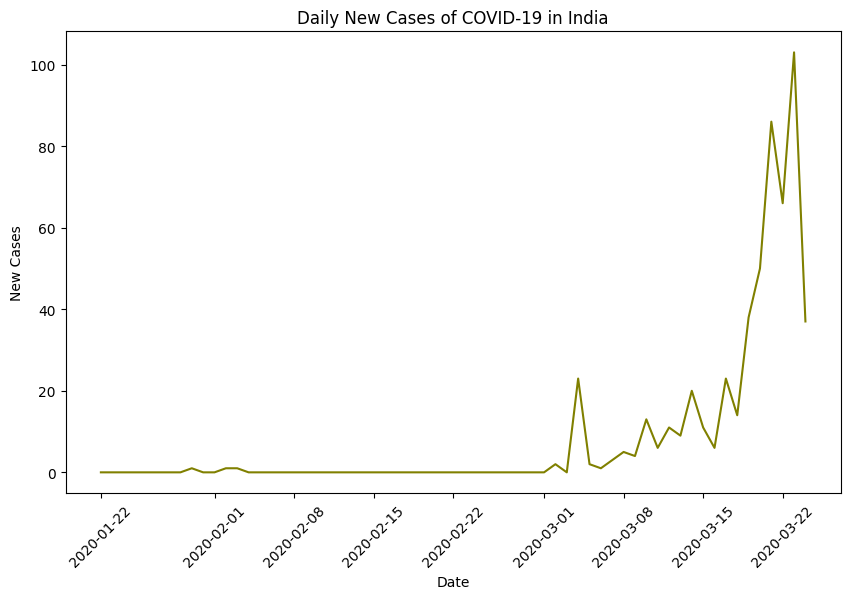

In [ ]:
# Create a line chart to visualize the daily new cases of COVID-19 for a selected country (eg., USA, India, or Brazil)
india = data[data['Country/Region']=='India']
india = india.groupby('Date', as_index = False).sum()
india['Date'] = pd.to_datetime(india['Date'])
india['New Cases'] = india['ConfirmedCases'].diff().fillna(0)
plt.figure(figsize=(10, 6))
plt.plot(india['Date'], india['New Cases'], color = 'olive')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('New Cases')
plt.title('Daily New Cases of COVID-19 in India')
plt.show()

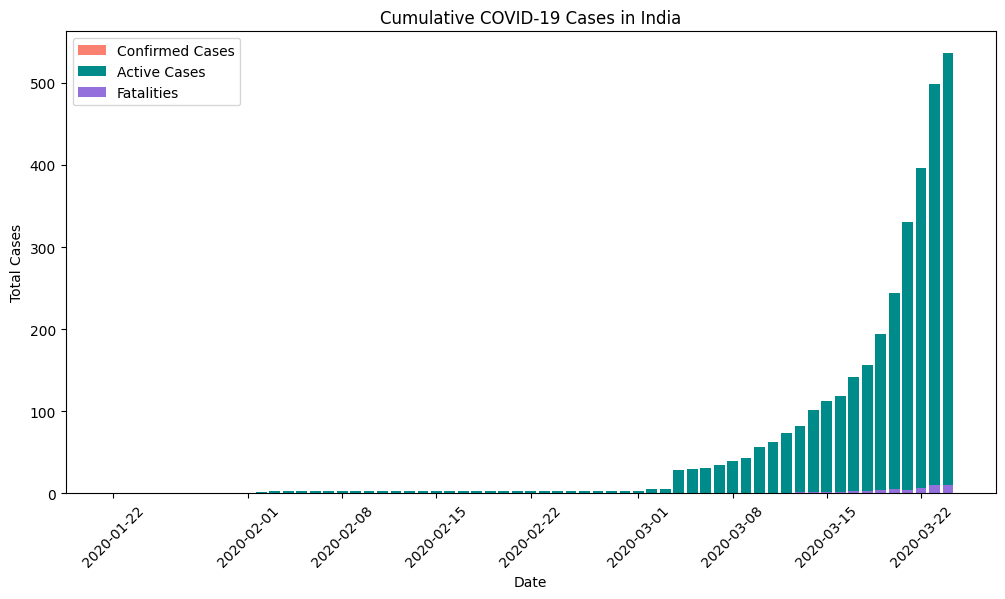

In [ ]:
# Use a stacked bar chart to compare the total confirmed, recovered and fatal cases in the selected country over time
india['Active'] = india['ConfirmedCases'] - india['Fatalities']
plt.figure(figsize = (12, 6))
plt.bar(india['Date'], india['ConfirmedCases'], color = 'salmon', label = 'Confirmed Cases')
plt.bar(india['Date'], india['Active'], label='Active Cases', color='darkcyan', bottom=india['Fatalities'])
plt.bar(india['Date'], india['Fatalities'], label='Fatalities', color='mediumpurple')
plt.title('Cumulative COVID-19 Cases in India')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Create a funnel chart to show the progression of COVID-19 cases through stages like confirmed, active, recovered, and fatal in your selected country
india['Active'] = india['ConfirmedCases'] - india['Fatalities']
latestdata = india.iloc[-1]
stages = ['Confirmed Cases', 'Active Cases', 'Fatalities']
values = [latestdata['ConfirmedCases'], latestdata['Active'], latestdata['Fatalities']]
fig = px.funnel(
    x=values,
    y=stages,
    title='COVID-19 Case Progression in India',
    labels={'x': 'Number of Cases', 'y': 'Stages'}
)
fig.show()